R-squared score on the test set: 0.8291379087166058


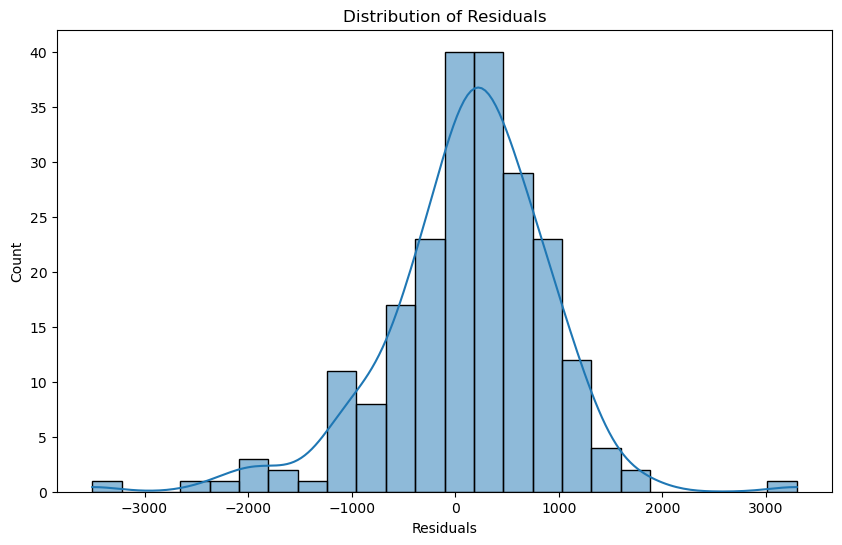

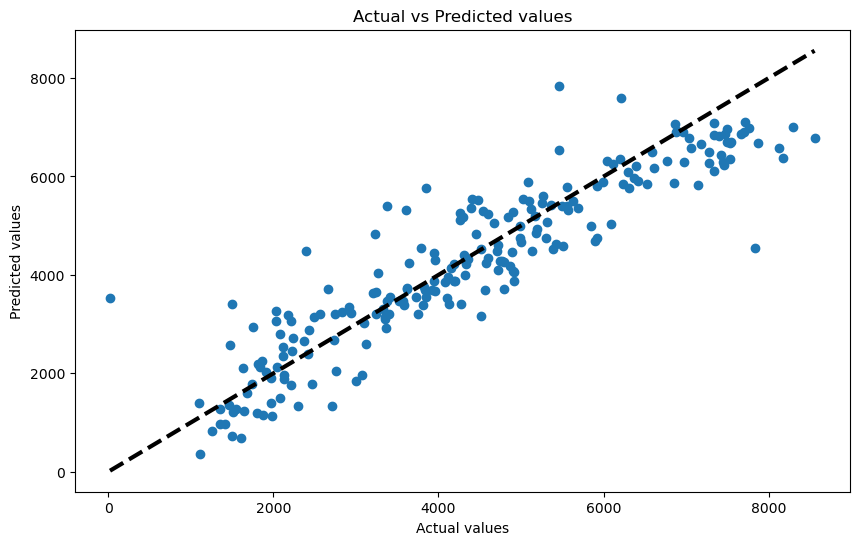

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset from the CSV file
data = pd.read_csv('day.csv')

# Convert categorical variables from numbers to meaningful labels
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light', 4: 'Heavy'})

# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True)

# Check for and drop any missing values in the dataset
data = data.dropna()

# Define the feature variables (X) and the target variable (y)
# Drop columns that are not needed for prediction
X = data.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = data['cnt']

# Scale the feature variables so that they have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
# 70% of the data will be used for training, and 30% will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a linear regression model and train it with the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared score on the test set: {r2}')

# Analyze the residuals (differences between actual and predicted values)
residuals = y_test - y_pred

# Plot the distribution of residuals to check if they are normally distributed
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Plot actual vs. predicted values to see how well the model predicts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()
